# Analyzing Fashion Data Trends to Predictive Insights

This project aims to conduct a comprehensive analysis on fashion data trends to explore the evolution of trends and gain insights into predictive future trends. Fashion is one of my main hobbies and I spend time scrolling Pinterest and other social media apps in hopes to acquire an understanding of what is going to popular in the upcoming seasons so I can base my clothing purchases on such. I have spent countless hours exploring these apps to try and see which predictions other people are making so I can make my own predictions as well. Analyzing the fashion data, uncovered these patterns and influenced me more efficiently. Predictive trends is a huge part of the marketing world and I think data science will help and has helped make a difference in the fashion world.

The dataset I will be anazlying: [Fashion Trend Dataset ](https://www.kaggle.com/datasets/fashionworldda/fashion-trend-dataset)

This dataset encapsulates the core of fashion-related information spanning from 2018 to 2022. It encompasses records of diverse fashion items, offering insights into their gender suitability, category, design motif, coloration, targeted age groups, seasonal inclination, material composition, pricing, sales volume, customer reviews, ratings, and additional attributes. The primary objective of this dataset is to analyze the preferences, shifts in trends, and sales performance of varied fashion items throughout a three-year period.

In [40]:
import pandas as pd

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
file_path = '/content/drive/My Drive/Fashion/fashion.csv'

In [43]:
fashion = pd.read_csv("fashion.csv")
fashion.head()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,20%,1/28/2018,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0%,1/28/2018,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,5%,1/7/2018,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,10%,1/1/2018,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0%,1/28/2018,126,1,2018


# Pandas

Is there correlation between product price and material used?


In [44]:
price_material = fashion.groupby('material')['price'].mean()
print(price_material)

highest_price_material = price_material.idxmax()

highest_average_price = price_material.max()

print("Material with the highest average price:", highest_price_material)
print("Highest average price:", highest_average_price)

material
Cotton          89.568293
Cotton Blend    89.451500
Denim           77.674272
Leather         81.047500
Synthetic       91.835059
Viscose         80.374222
Wool            86.667083
Name: price, dtype: float64
Material with the highest average price: Synthetic
Highest average price: 91.83505882352942


What are the most popular categories of products?

In [45]:
most_popular = fashion['category'].value_counts()
print(most_popular)

num_products_most_popular = fashion['category'].value_counts().max()

print("Most popular category:", most_popular.idxmax())
print("Number of products in the most popular category:", num_products_most_popular)


category
Skirt     99
Dress     86
Shorts    82
Blouse    82
Shoes     82
Shirt     78
Jeans     78
Jacket    73
Name: count, dtype: int64
Most popular category: Skirt
Number of products in the most popular category: 99


What are the top-selling products in each season?

In [137]:
winter_data = fashion[fashion['season'] == 'Winter']
winter_sales_counts = winter_data.groupby('product_name')['sales_count'].sum()
top_selling_winter_products = winter_sales_counts.sort_values(ascending=False)

print("Top Selling Products in Winter:")
print(top_selling_winter_products.idxmax())

spring_data = fashion[fashion['season'] == 'Spring']
spring_sales_counts = spring_data.groupby('product_name')['sales_count'].sum()
top_selling_spring_products = spring_sales_counts.sort_values(ascending=False)

print("Top Selling Products in Spring:")
print(top_selling_spring_products.idxmax())

summer_data = fashion[fashion['season'] == 'Summer']
summer_sales_counts = summer_data.groupby('product_name')['sales_count'].sum()
top_selling_summer_products = summer_sales_counts.sort_values(ascending=False)

print("Top Selling Products in Summer:")
print(top_selling_summer_products.idxmax())

autumn_data = fashion[fashion['season'] == 'Autumn']
autumn_sales_counts = autumn_data.groupby('product_name')['sales_count'].sum()
top_selling_autumn_products = autumn_sales_counts.sort_values(ascending=False)

print("Top Selling Products in Autumn:")
print(top_selling_autumn_products.idxmax())

Top Selling Products in Winter:
Beach Shirt
Top Selling Products in Spring:
Biker Jacket
Top Selling Products in Summer:
Casual Jeans
Top Selling Products in Autumn:
Beach Shirt


Which is the most popular patter of each year?

In [139]:
pattern_by_year = fashion.groupby(['year_of_sale', 'pattern']).size()
most_common_pattern_by_year = pattern_by_year.groupby('year_of_sale').idxmax()

print("Most Popular Pattern by Year:")
print(most_common_pattern_by_year)

Most Popular Pattern by Year:
year_of_sale
2018    (2018, Geometric)
2019        (2019, Plain)
2020    (2020, Geometric)
2021        (2021, Plain)
2022        (2022, Plain)
dtype: object


# Numpy


In [49]:
import numpy as np

What are the maximum and minimum prices per category and by gender?

In [52]:
max_price_by_category = fashion.groupby('category')['price'].max()
min_price_by_category = fashion.groupby('category')['price'].min()

max_price_by_gender = fashion.groupby('gender')['price'].max()
min_price_by_gender = fashion.groupby('gender')['price'].min()

print("Maximum prices by category:")
print(max_price_by_category)
print("\nMinimum prices by category:")
print(min_price_by_category)
print("\nMaximum prices by gender:")
print(max_price_by_gender)
print("\nMinimum prices by gender:")
print(min_price_by_gender)

Maximum prices by category:
category
Blouse    146.88
Dress     149.88
Jacket    149.93
Jeans     147.52
Shirt     148.90
Shoes     148.92
Shorts    149.50
Skirt     147.91
Name: price, dtype: float64

Minimum prices by category:
category
Blouse    21.63
Dress     21.78
Jacket    23.07
Jeans     20.80
Shirt     23.19
Shoes     24.14
Shorts    25.76
Skirt     20.25
Name: price, dtype: float64

Maximum prices by gender:
gender
Female    149.93
Male      149.93
Name: price, dtype: float64

Minimum prices by gender:
gender
Female    20.47
Male      20.25
Name: price, dtype: float64


In [110]:
total_sales_by_product = (fashion['price'] * fashion['sales_count']).groupby(fashion['product_name']).sum()

num_units_sold_by_product = fashion.groupby('product_name')['sales_count'].sum()

print("Total sales revenue for each product:")
print(total_sales_by_product)

print("\nNumber of units sold for each product:")
print(num_units_sold_by_product)

Total sales revenue for each product:
product_name
Beach Shirt       1813845.75
Biker Jacket      1051643.36
Blouse            1875410.47
Business Shirt    1395705.07
Casual Jeans      1700807.78
Chino Shorts      1411638.52
Heels             1319596.66
Pattern Skirt     1497066.00
Summer Dress      1375725.26
Wool Jacket       1469827.96
dtype: float64

Number of units sold for each product:
product_name
Beach Shirt       22385
Biker Jacket      12870
Blouse            22064
Business Shirt    16251
Casual Jeans      20014
Chino Shorts      16691
Heels             15039
Pattern Skirt     16707
Summer Dress      16381
Wool Jacket       16863
Name: sales_count, dtype: int64


# Visual Data


In [111]:
from matplotlib import pyplot as plt

What are the most popular colors per season?


<Figure size 1200x600 with 0 Axes>

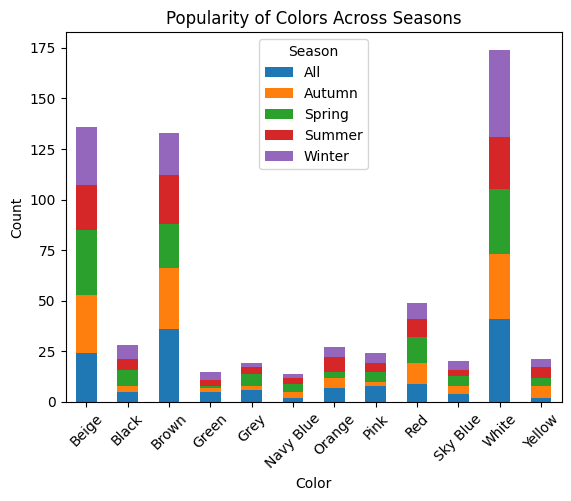

In [141]:
color_season_counts = fashion.groupby(['color', 'season']).size().unstack()

plt.figure(figsize=(12, 6))
color_season_counts.plot(kind='bar', stacked=True)
plt.title('Popularity of Colors Across Seasons')
plt.xlabel('Color')
plt.ylabel('Count')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.show()

What is the average price of the products

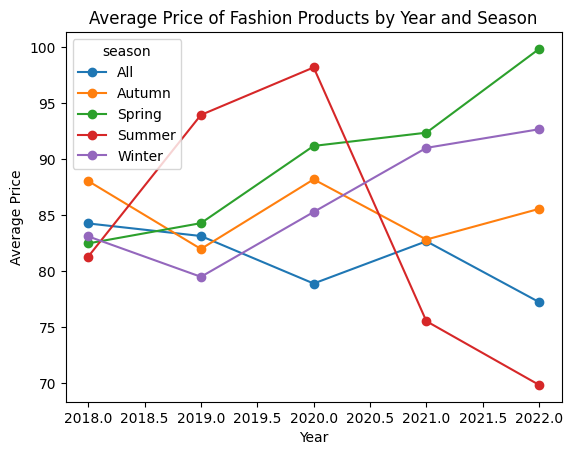

In [83]:
year_season = fashion.groupby(['year_of_sale', 'season'])
avg_price_by_year_season = year_season['price'].mean()

avg_price_by_year_season.unstack().plot(marker='o')
plt.title('Average Price of Fashion Products by Year and Season')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

What is the frequency of each type of category according to the season and year?

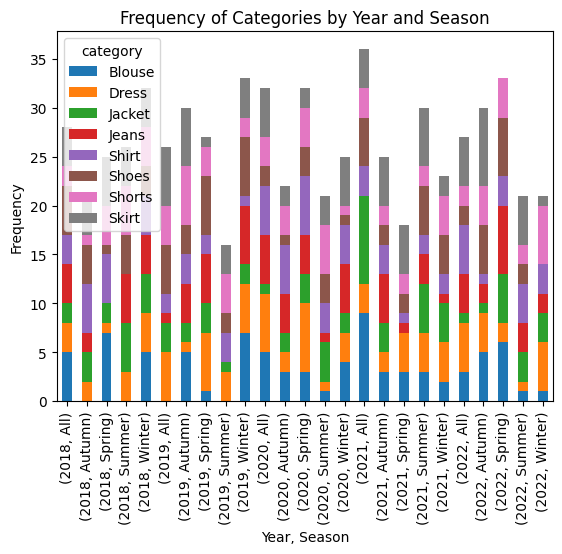

In [81]:
categories_by_year_season = year_season['category'].value_counts().unstack()
ax = categories_by_year_season.plot(kind='bar', stacked=True)
plt.title('Frequency of Categories by Year and Season')
plt.xlabel('Year, Season')
plt.ylabel('Frequency')
plt.show()

In [84]:
categories_by_year_season = year_season['category'].value_counts().unstack()
categories_by_year_season

category             Blouse  Dress  Jacket  Jeans  Shirt  Shoes  Shorts  Skirt
year_of_sale season                                                           
2018         All        5.0    3.0     2.0    4.0    3.0    5.0     2.0    4.0
             Autumn     NaN    2.0     3.0    2.0    5.0    4.0     1.0    4.0
             Spring     7.0    1.0     2.0    NaN    5.0    1.0     4.0    5.0
             Summer     NaN    3.0     5.0    5.0    NaN    4.0     5.0    4.0
             Winter     5.0    4.0     4.0    4.0    4.0    3.0     4.0    4.0
2019         All        NaN    5.0     3.0    1.0    2.0    5.0     4.0    6.0
             Autumn     5.0    1.0     2.0    4.0    3.0    3.0     6.0    6.0
             Spring     1.0    6.0     3.0    5.0    2.0    6.0     3.0    1.0
             Summer     NaN    3.0     1.0    NaN    3.0    2.0     4.0    3.0
             Winter     7.0    5.0     2.0    6.0    1.0    6.0     2.0    4.0
2020         All        5.0    6.0     1.0    5.0    5.0    2.0     3.0    5.0
             Autumn     3.0    2.0     2.0    4.0    5.0    1.0     3.0    2.0
             Spring     3.0    7.0     3.0    4.0    6.0    3.0     4.0    2.0
             Summer     1.0    1.0     4.0    1.0    3.0    3.0     5.0    3.0
             Winter     4.0    3.0     2.0    5.0    4.0    1.0     1.0    5.0
2021         All        9.0    3.0     9.0    NaN    3.0    5.0     3.0    4.0
             Autumn     3.0    2.0     3.0    5.0    3.0    2.0     2.0    5.0
             Spring     3.0    4.0     NaN    1.0    1.0    2.0     2.0    5.0
             Summer     3.0    4.0     5.0    3.0    2.0    5.0     2.0    6.0
             Winter     2.0    4.0     4.0    1.0    2.0    4.0     4.0    2.0
2022         All        3.0    5.0     1.0    4.0    5.0    2.0     2.0    5.0
             Autumn     5.0    4.0     1.0    2.0    1.0    5.0     4.0    8.0
             Spring     6.0    2.0     5.0    7.0    3.0    6.0     4.0    NaN
             Summer     1.0    1.0     3.0    3.0    4.0    2.0     2.0    5.0
             Winter     1.0    5.0     3.0    2.0    3.0    NaN     6.0    1.0

What are the top 5 most used materials?

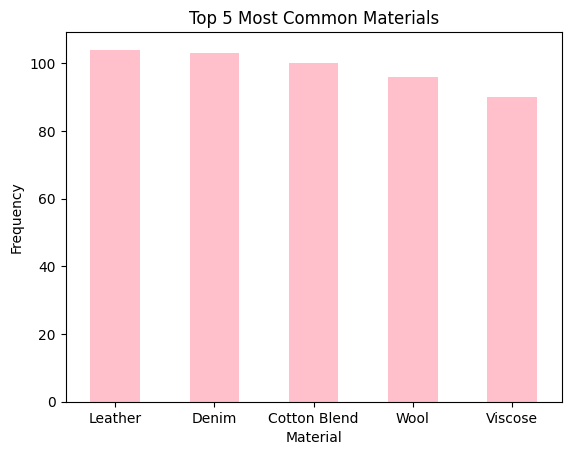

In [130]:
top_materials = fashion['material'].value_counts().head(5)
top_materials.plot(kind='bar', color='pink')
plt.title('Top 5 Most Common Materials')
plt.xlabel('Material')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

What is the total sales count over all of the years?

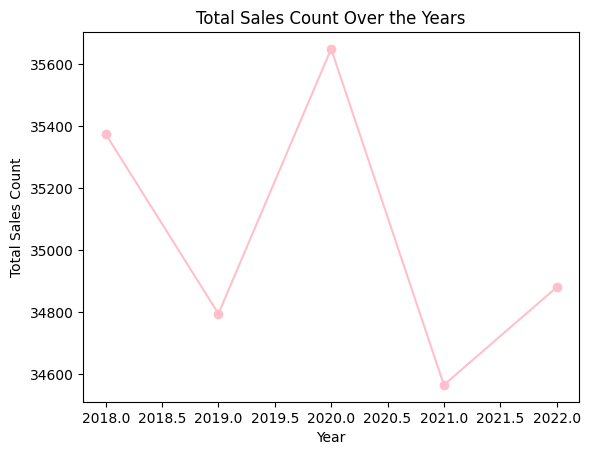

In [108]:
sales_over_years = fashion.groupby('year_of_sale')['sales_count'].sum()
sales_over_years.plot(marker='o', color='pink')
plt.title('Total Sales Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales Count')
plt.xticks(rotation=0)
plt.show()

# Conclusion

Overall, anaylyzing this specific fashion dataset has provided many useful analysis of trends such as price, color, season, year of sale, and more. Firstly, there is definitely correlation between price and material, as well as popularity of material. The data has shown that Synthetic material costs the most and is not in the top 5 most used materials. Addtionally, the top two most used materials were leather and denim. I would advise fashion brands to lean more into making clothes with leather and denim opposed to synthetic if they want to appeal to a larger audience. Secondly, skirts were shown to be the most popular category, this could insinuate that brands should look more into producing skirts. Something that I found interesting about this dataset is that the most popular item that was sold for Winter and Autumn were beach shirts. This does not seem to align with weather. Another thing I found interesting was the geometric being the most popular pattern in 2018. It brought me back to that era of fashion and I definitely remember that being a popular print. My two favorite plots were the Popularity of Colors Across Seasons and the Frequency of Categories by Year and Season plots. I knew the basic colors would be the most popular, but it was nice to see a visual of each color popularity per season. This could help brands narrow down which colors would be the most popular for production depending on the season. Also, I thought the total sales count was a good indication of spending over the years. The highest being in 2020 makes sense since we were all locked inside, so online shopping became significantly more popular. It was awesome combining my knowledge of fashion with my academic pursuits.